In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set_palette("Dark2")
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5)

In [2]:
# versions

print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas==1.5.3
numpy==1.24.2
seaborn==0.12.2


In [3]:
# import the data prepared in ERF_get_data

df = pd.read_csv('...')

# limit to only taxonomists, and create another df with the full dataset

df2 = df.copy()
df = df.loc[df['taxonomist?'] == 'taxonomist']

len(df)

456

We gave three abstracts, differing in whether they state the taxon is threatened or abundant, or just not giving any indication of conservation status (neutral). The figures below give the results for 'do you agree with the abstract' and 'would you accept it for a conference presentation?' in general and comparing various groups of respondents.

# Variables and categories used for the analysis

In [4]:
demo = ['taxonomist?', 'professional',
       'Country', 'specialization', 'broad_reader', 'experience', 'species_concepts', 'continent']
agree = ['c1_agree', 'c2_agree','c3_agree']
accept = ['c1_accept','c2_accept','c3_accept']
cases = ['condition_c1','condition_c2','condition_c3']
demo2 = ['taxonomist?','professional','specialization','broad_reader','experience','species_concepts']
lacking = ['c2_lack_morph', 'c2_lack_dna', 'c2_lack_hab','c2_lack_other']

# dictionary for titles
q_dct = {'condition_c1': 'Condition plant case','condition_c2':'Condition frog case','condition_c3':'Condition flatworm case',
        'c1_agree':'Agreement plant case','c2_agree':'Agreement frog case','c3_agree':'Agreement flatworm case'}


# Main data

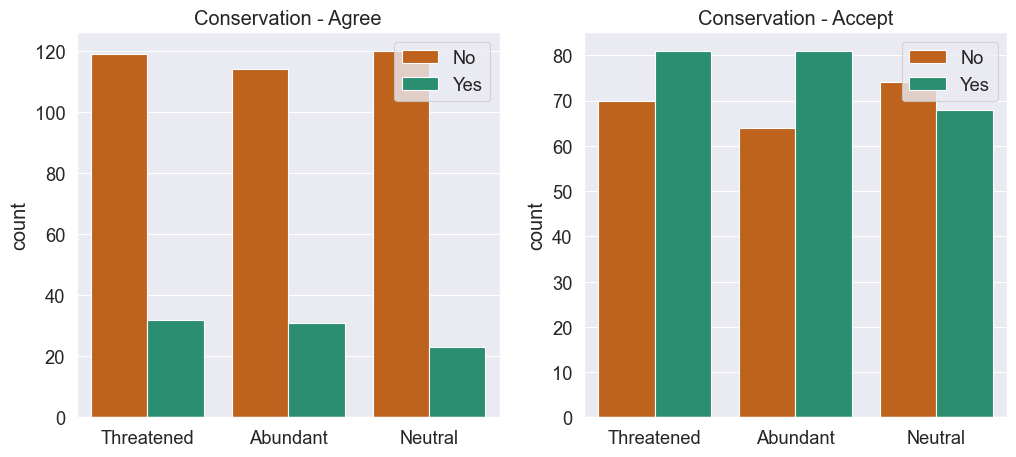

In [5]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df.loc[df.condition_c1 != 'No response'], x = 'condition_c1',palette=["C1", "C0"], hue = 'c1_accept', ax =ax[1])
ax[1].set_title('Conservation - Accept')
ax[1].set_xlabel('')
ax[1].legend(['No','Yes'])


sns.countplot(data = df.loc[df.condition_c1 != 'No response'], x = 'condition_c1', hue = 'c1_agree', palette=["C1", "C0"],ax =ax[0])
ax[0].set_title('Conservation - Agree')
ax[0].set_xlabel('')
ax[0].legend(['No','Yes'])



plt.show()

In [6]:
# disagreement

ct = pd.crosstab(df.loc[df.condition_c1 != 'No response']['condition_c1'],  df.loc[df.condition_c1 != 'No response']['c1_agree'])

ct['summed'] = ct.sum(axis = 1)
ct['agreement'] = np.where(ct.no > ct.yes, ct.yes / ct.summed, ct.no / ct.summed)

print(f'mean disagreement for case 1: {ct.agreement.mean()}')
ct


mean disagreement for case 1: 0.19551759802958704


c1_agree,no,yes,summed,agreement
condition_c1,,,,
Abundant,114,31,145,0.213793
Neutral,120,23,143,0.160839
Threatened,119,32,151,0.211921


# Agree & Accept

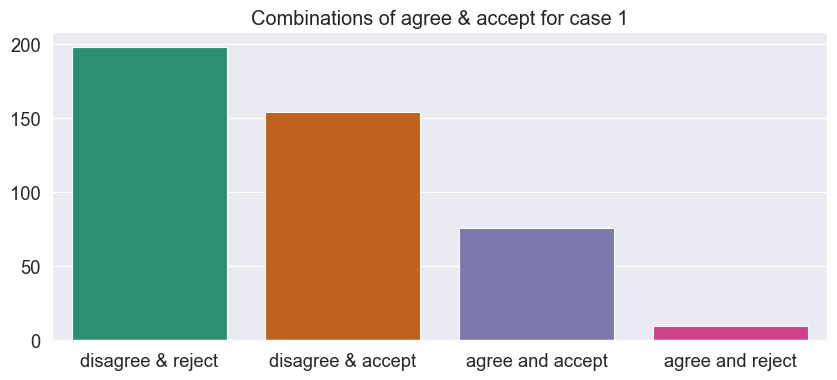

In [7]:
fig, ax = plt.subplots(figsize = (10,4))

df['c1AgAc'] = (df['c1_agree']) + (df['c1_accept'])

sns.countplot(data = df.loc[(df.c1_agree != 'No response') & (df.c1_accept != 'No response')],
             x = 'c1AgAc',
             ax=ax)
ax.set_xticklabels(['disagree & reject','disagree & accept','agree and accept','agree and reject'])
ax.set_title('Combinations of agree & accept for case 1')
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

# non-taxonomists

In [8]:
df2['taxonomist?'].value_counts()

taxonomist        456
non_taxonomist     97
Name: taxonomist?, dtype: int64

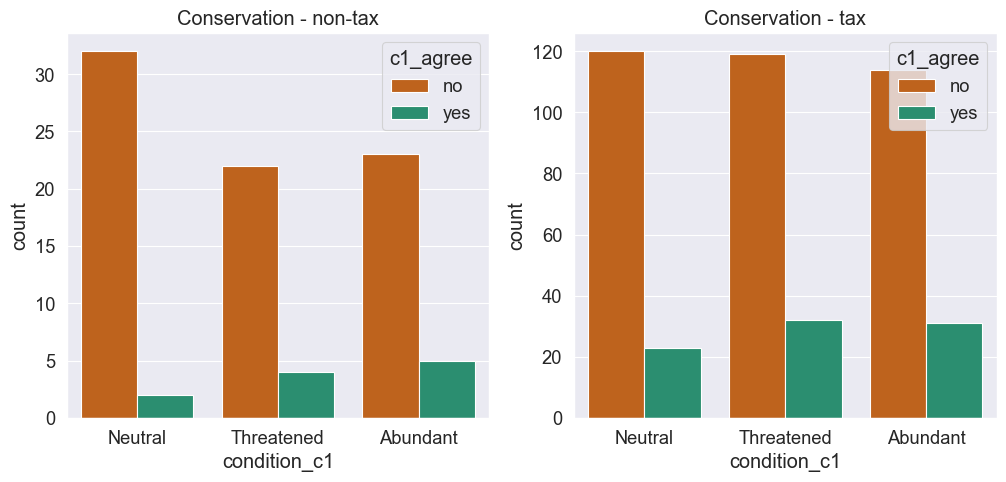

In [9]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df2.loc[(df2.condition_c1 != 'No response') & (df2['taxonomist?'] == 'taxonomist')], order = ['Neutral', 'Threatened','Abundant'],x = 'condition_c1',palette=["C1", "C0"], hue = 'c1_agree', ax =ax[1])
ax[1].set_title('Conservation - tax')

sns.countplot(data = df2.loc[(df2.condition_c1 != 'No response') & (df2['taxonomist?'] == 'non_taxonomist')], order = ['Neutral', 'Threatened','Abundant'],x = 'condition_c1', hue = 'c1_agree', palette=["C1", "C0"],ax =ax[0])
ax[0].set_title('Conservation - non-tax')

plt.show()

# just the botanists

Total number of botanists: 59


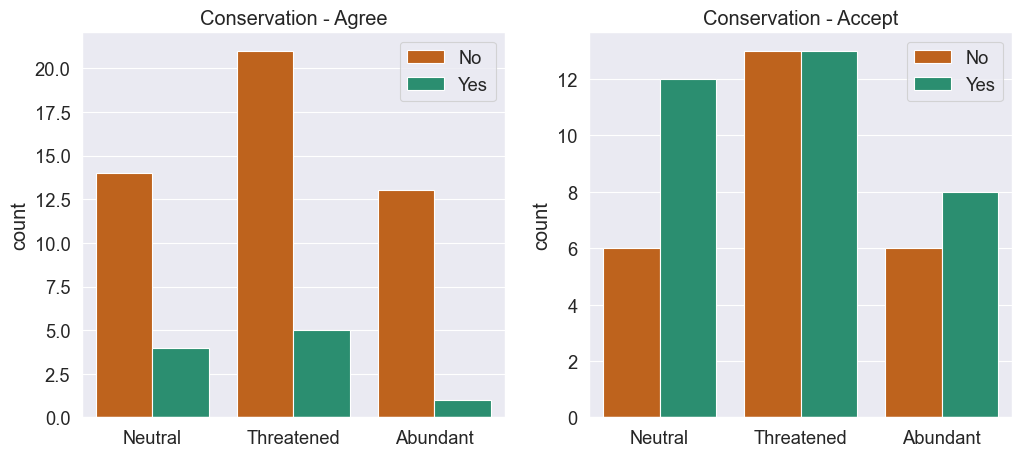

In [10]:
df3 = df.loc[df.specialization == 'Plants'].copy()

print(f'Total number of botanists: {len(df3)}')

fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df3.loc[df3.condition_c1 != 'No response'], x = 'condition_c1',palette=["C1", "C0"], hue = 'c1_accept', ax =ax[1])
ax[1].set_title('Conservation - Accept')

sns.countplot(data = df3.loc[df3.condition_c1 != 'No response'], x = 'condition_c1', hue = 'c1_agree', palette=["C1", "C0"],ax =ax[0])
ax[0].set_title('Conservation - Agree')

ax[0].set_xlabel('')
ax[0].legend(['No','Yes'])
ax[1].set_xlabel('')
ax[1].legend(['No','Yes'])

plt.show()

# Low vs high income countries for 'do you agree?'

In [11]:
# number of low income countries respondents

len(df.loc[df.low_income =='1'])

146

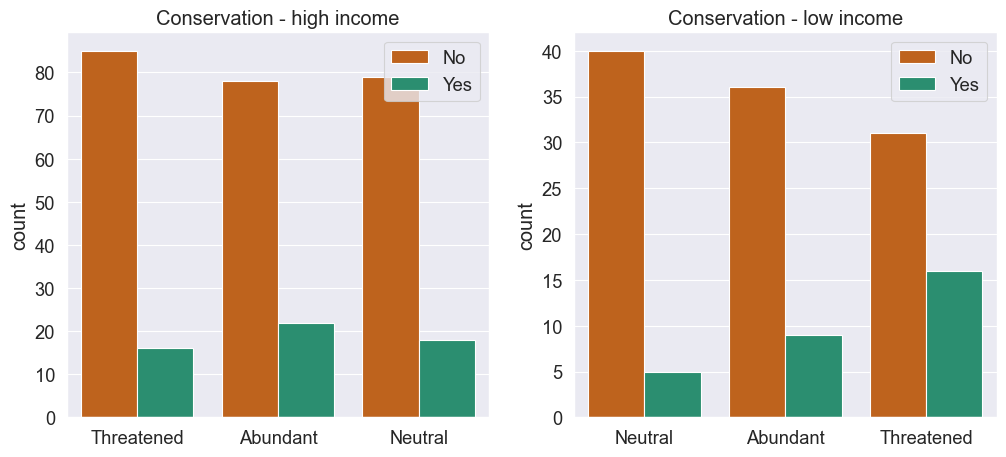

In [12]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & (df['low_income'] == '1')], x = 'condition_c1',palette=["C1", "C0"], hue = 'c1_agree', ax =ax[1])
ax[1].set_title('Conservation - low income')

sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & (df['low_income'] == '0')], x = 'condition_c1', hue = 'c1_agree', palette=["C1", "C0"],ax =ax[0])
ax[0].set_title('Conservation - high income')

ax[0].set_xlabel('')
ax[0].legend(['No','Yes'])
ax[1].set_xlabel('')
ax[1].legend(['No','Yes'])


plt.show()

# Continents grouped for 'do you agree?'

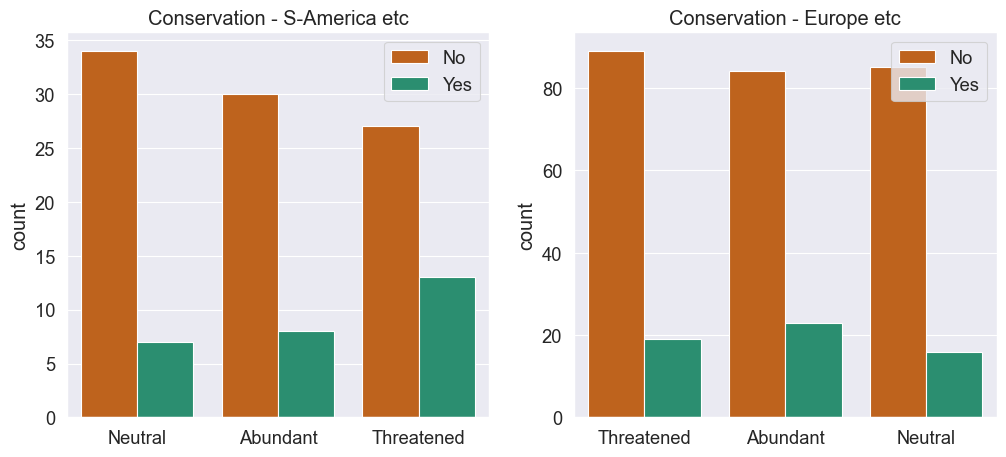

In [13]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & ((df['continent'] == 'Europe') |
                                                                  (df['continent'] == 'North America') | 
                                                                  (df['continent'] == 'Oceania'))], x = 'condition_c1',palette=["C1", "C0"], hue = 'c1_agree', ax =ax[1])
ax[1].set_title('Conservation - Europe etc')

sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & ((df['continent'] == 'Africa') |
                                                                  (df['continent'] == 'South America') | 
                                                                  (df['continent'] == 'Asia'))], x = 'condition_c1',palette=["C1", "C0"], hue = 'c1_agree', ax =ax[0])
ax[0].set_title('Conservation - S-America etc')

ax[0].set_xlabel('')
ax[0].legend(['No','Yes'])
ax[1].set_xlabel('')
ax[1].legend(['No','Yes'])

plt.show()

# Continents for 'do you agree?'

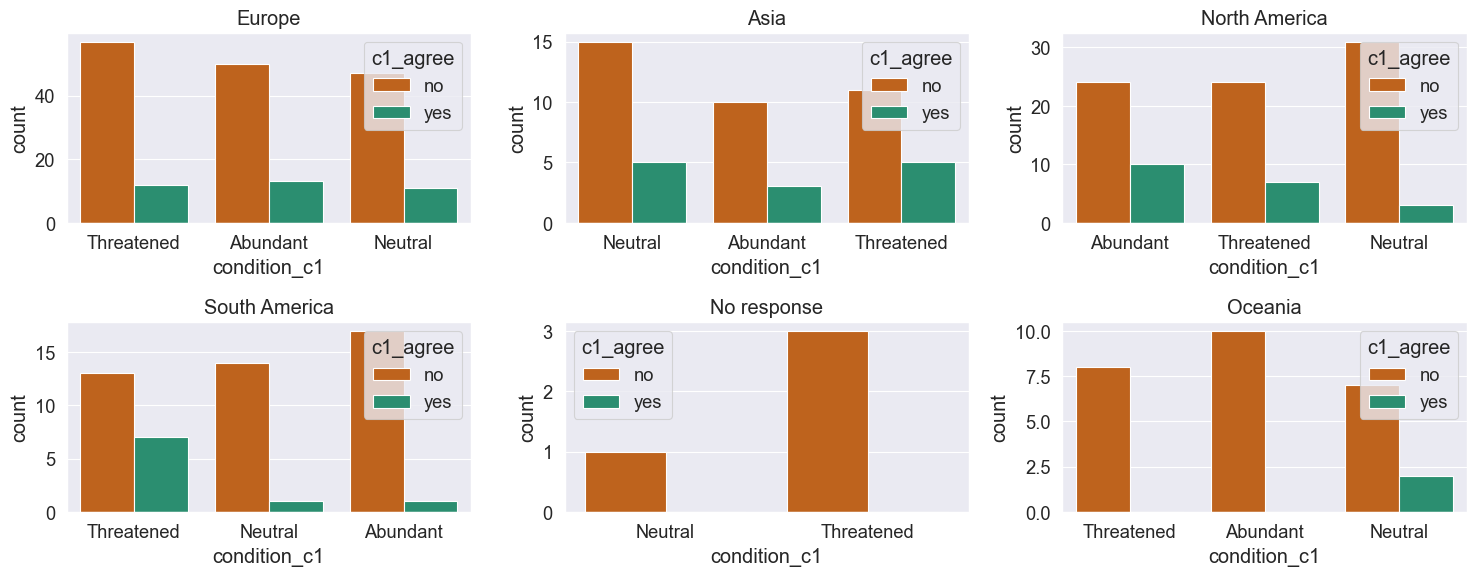

In [14]:
fig, axs = plt.subplots(2,3, figsize = (15,6))

for ax, col in zip(axs.flat, df.continent.unique()):

    sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & (df['continent'] == col)], x = 'condition_c1',palette=["C1", "C0"], hue = 'c1_agree', hue_order = ['no','yes'], ax =ax)
    ax.set_title(col)
#     ax.legend('')

# axs[4].legend(['no','yes'])

fig.tight_layout()

# By professional status



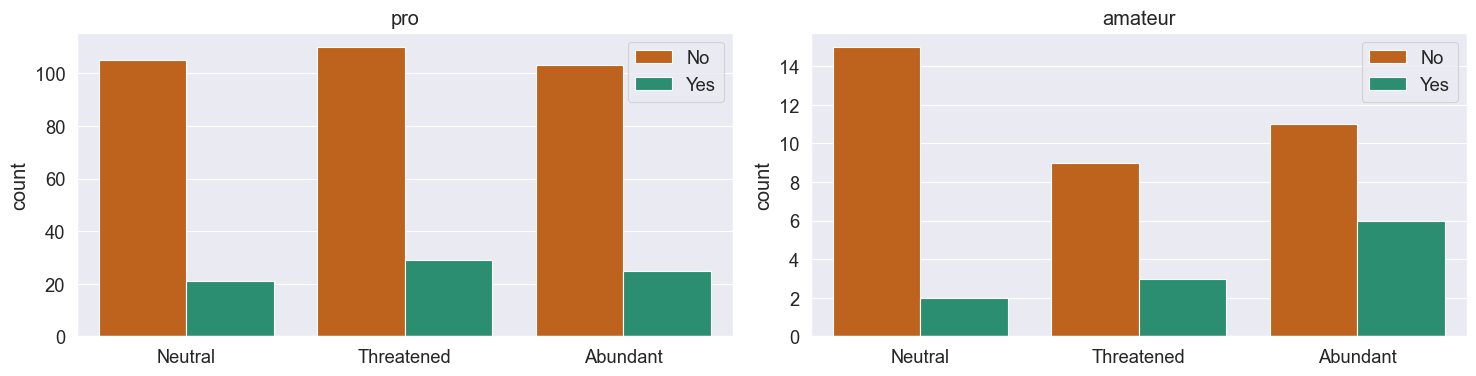

In [15]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,4))

for ax, col in zip(axs.flat, df.professional.unique()):

    sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & (df['professional'] == col)], x = 'condition_c1',palette=["C1","C0"],order = ['Neutral','Threatened','Abundant'], hue = 'c1_agree',hue_order= ['no','yes'], ax =ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.legend(['No','Yes'])


fig.tight_layout()

# By age group

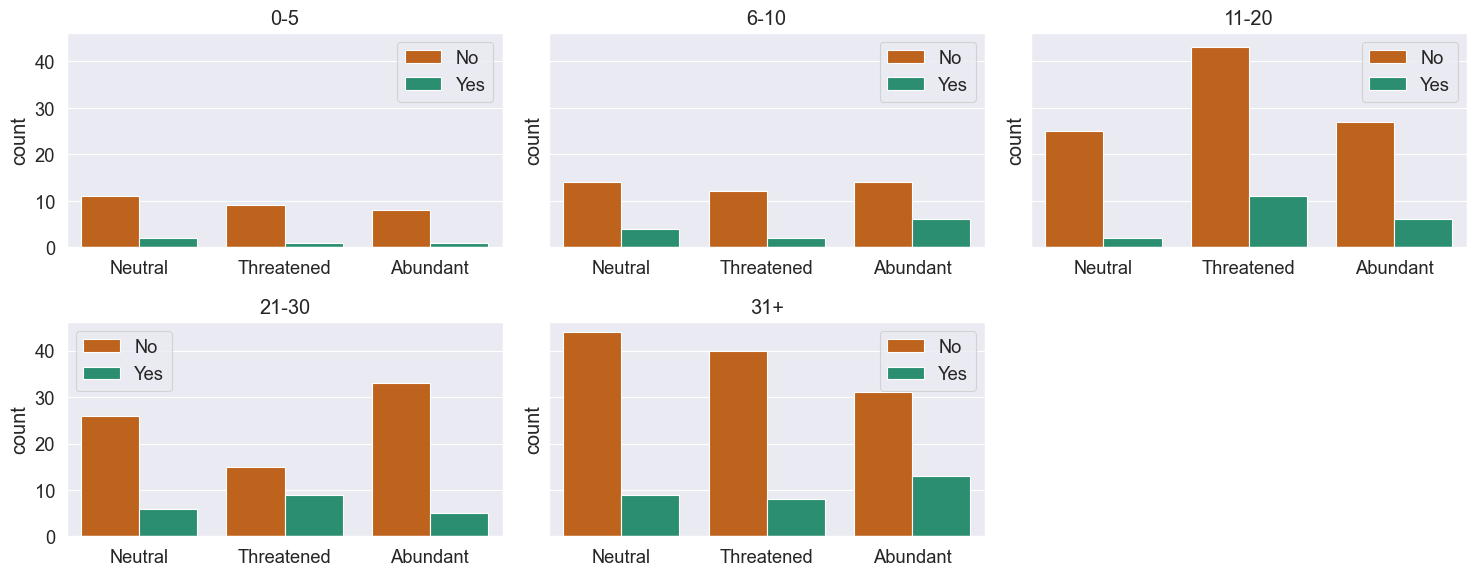

In [16]:
fig, axs = plt.subplots(2,3, figsize = (15,6), sharey = True)

for ax, col in zip(axs.flat, ['0-5','6-10', '11-20', '21-30', '31+']):

    sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & (df['experience'] == col)], x = 'condition_c1',palette=["C1", "C0"],order = ['Neutral','Threatened','Abundant'], hue = 'c1_agree',hue_order= ['no','yes'], ax =ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.legend(['No','Yes'])
    
axs[1,2].set_visible(False)
fig.tight_layout()

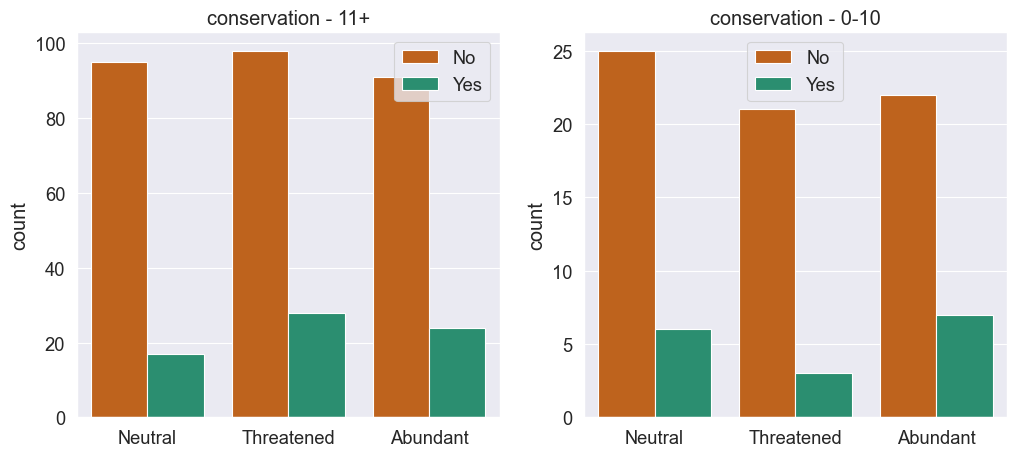

In [17]:
#age grouped

fig, ax = plt.subplots(ncols = 2, figsize = (12,5), sharey = False)

sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & ((df['experience'] == '0-5') |
                                                                  (df['experience'] == '6-10'))], x = 'condition_c1',palette=["C1", "C0"], order = ['Neutral','Threatened','Abundant'], hue = 'c1_agree', ax =ax[1])
ax[1].set_title('conservation - 0-10')

sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & ((df['experience'] == '11-20') |
                                                                  (df['experience'] == '21-30') | 
                                                                  (df['experience'] == '31+'))], x = 'condition_c1',palette=["C1", "C0"], order = ['Neutral','Threatened','Abundant'],hue = 'c1_agree', ax =ax[0])
ax[0].set_title('conservation - 11+')

ax[0].set_xlabel('')
ax[0].legend(['No','Yes'])
ax[1].set_xlabel('')
ax[1].legend(['No','Yes'])

plt.show()

# By specialization

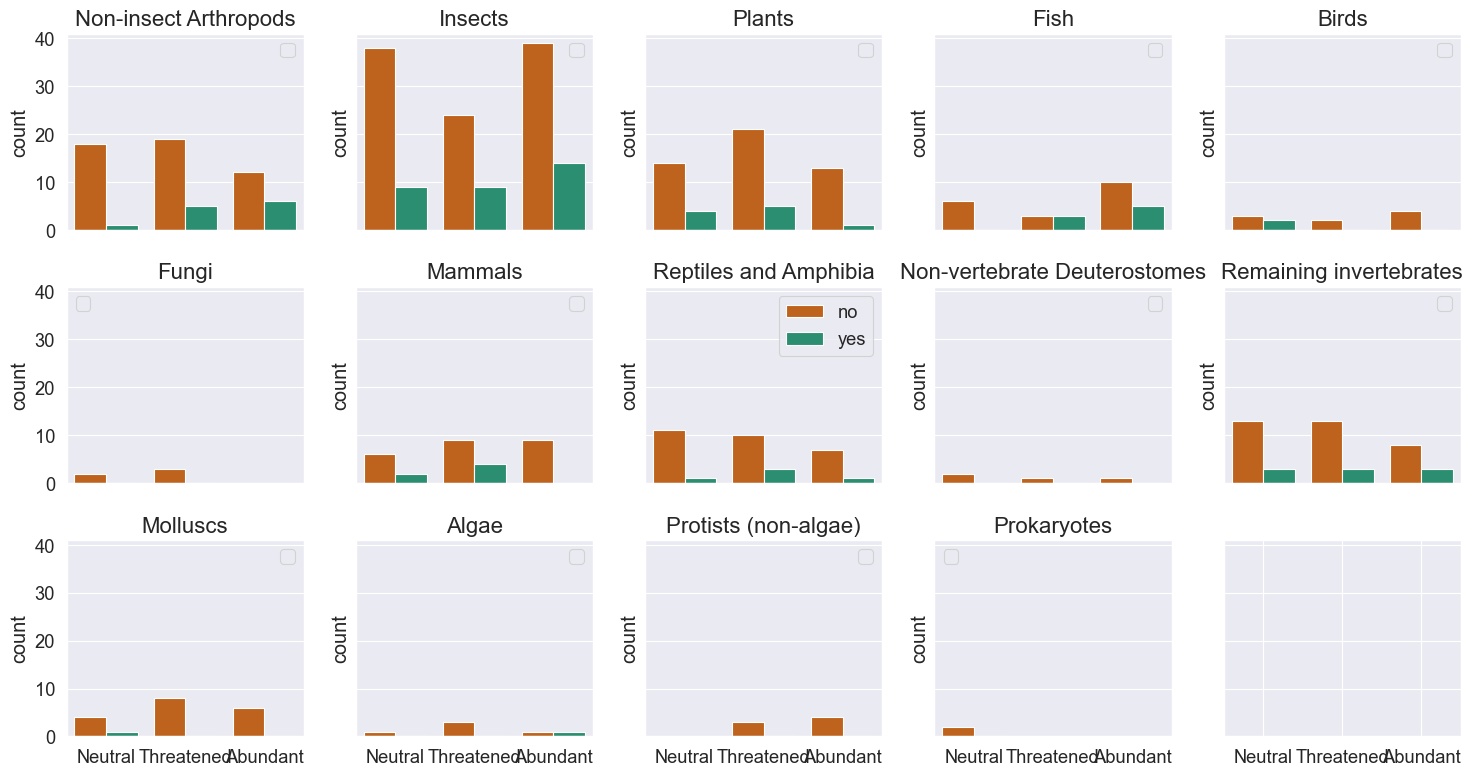

In [18]:
fig, axs = plt.subplots(3,5, figsize = (15,8), sharex = True, sharey=True)

specs = ['Non-insect Arthropods', 'Insects', 'Plants', 'Fish', 'Birds',
       'Fungi', 'Mammals', 'Reptiles and Amphibia',
       'Non-vertebrate Deuterostomes', 'Remaining invertebrates',
       'Molluscs', 'Algae',  'Protists (non-algae)', 'Prokaryotes']

for ax, col in zip(axs.flat,specs):

    (sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & (df['specialization'] == col)],
                   x = 'condition_c1',
                   palette=["C1", "C0"],
                   order = ['Neutral','Threatened','Abundant'],
                   hue = 'c1_agree',
                   hue_order= ['no','yes'],
                   ax =ax))
    ax.set_title(col, fontsize = 16)
    ax.legend('')
    ax.set_xlabel('')
axs[1,2].legend(['no','yes'])

fig.tight_layout()

# By Species Concept

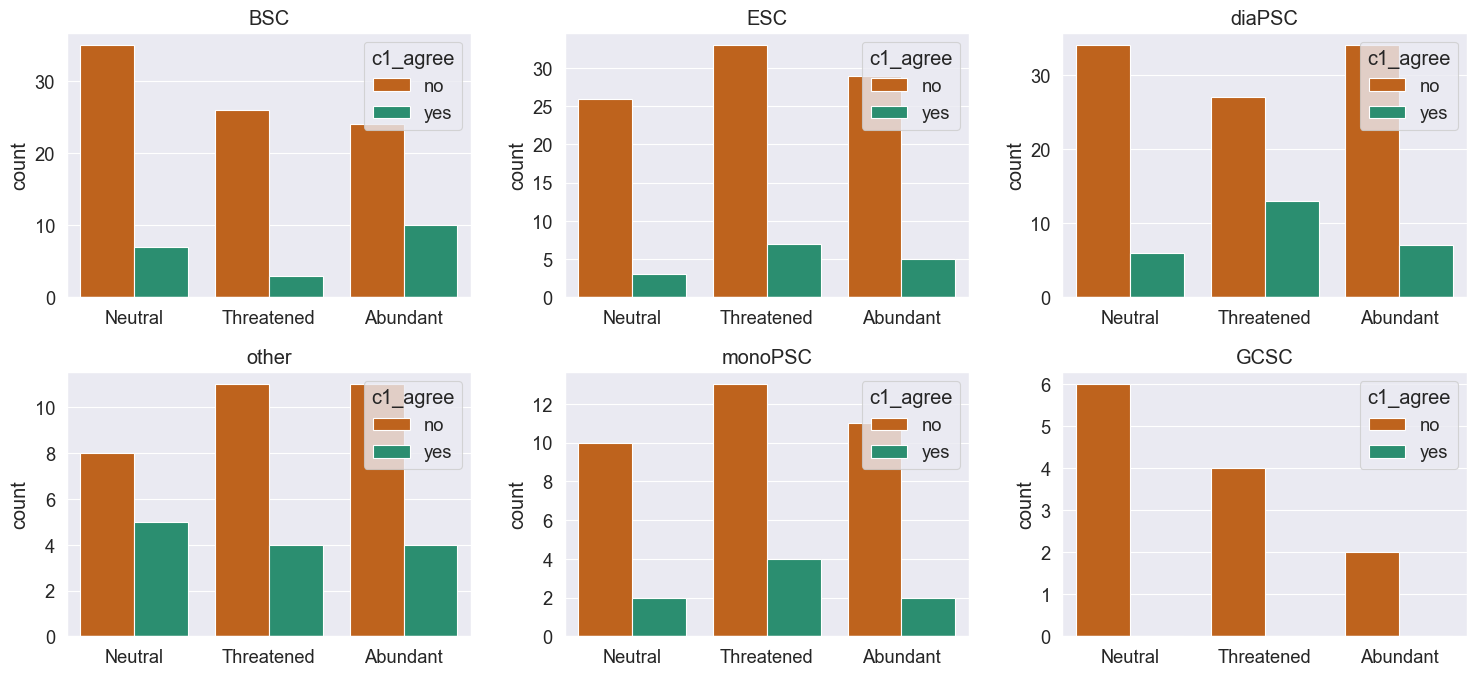

In [19]:
fig, axs = plt.subplots(2,3, figsize = (15,7))

for ax, col in zip(axs.flat, ['BSC', 'ESC', 'diaPSC', 'other', 'monoPSC', 'GCSC']):

    sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & (df['species_concepts'] == col)], x = 'condition_c1',palette=["C1", "C0"],order = ['Neutral','Threatened','Abundant'], hue = 'c1_agree',hue_order= ['no','yes'], ax =ax)
    ax.set_title(col)
    ax.set_xlabel('')

fig.tight_layout()